In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import mpl_toolkits.mplot3d as a3
import pandas as pd

In [13]:
datapath = "~/Desktop/Tesi/"

In [14]:
df = pd.read_csv(datapath+'20230828-1743_BGO_2SIPM_no-filtri_trigger_ext.txt', sep = " ", header = None, names = ["frame", "x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"])

In [6]:
df

,frame,x1,y1,x2,y2,x3,y3,x4,y4
0,1.0,-7.000000e-07,-8.000000e-03,-7.000000e-07,1.110223e-16,-7.000000e-07,-0.004,-7.000000e-07,-0.001
1,1.0,-6.990000e-07,1.110223e-16,-6.990000e-07,1.110223e-16,-6.990000e-07,-0.004,-6.990000e-07,-0.003
2,1.0,-6.980000e-07,-8.000000e-03,-6.980000e-07,1.110223e-16,-6.980000e-07,-0.004,-6.980000e-07,-0.001
3,1.0,-6.970000e-07,1.110223e-16,-6.970000e-07,1.110223e-16,-6.970000e-07,-0.004,-6.970000e-07,-0.003
4,1.0,-6.960000e-07,-8.000000e-03,-6.960000e-07,1.110223e-16,-6.960000e-07,-0.004,-6.960000e-07,-0.001
...,...,...,...,...,...,...,...,...,...
6285995,4490.0,6.950000e-07,2.400000e-02,6.950000e-07,1.110223e-16,6.950000e-07,0.004,6.950000e-07,0.001
6285996,4490.0,6.960000e-07,2.400000e-02,6.960000e-07,1.110223e-16,6.960000e-07,0.002,6.960000e-07,0.001
6285997,4490.0,6.970000e-07,3.200000e-02,6.970000e-07,8.000000e-03,6.970000e-07,0.002,6.970000e-07,0.001
6285998,4490.0,6.980000e-07,2.400000e-02,6.980000e-07,8.000000e-03,6.980000e-07,0.002,6.980000e-07,0.001


## Plot

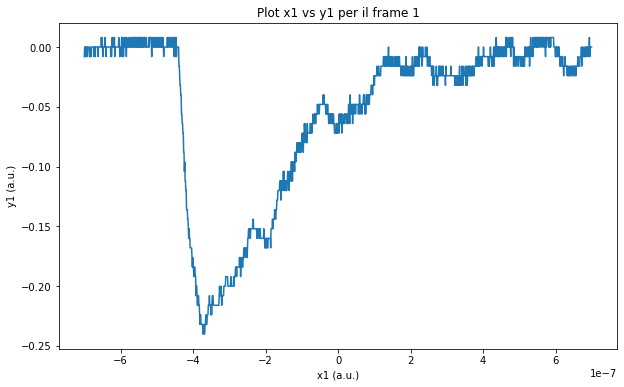

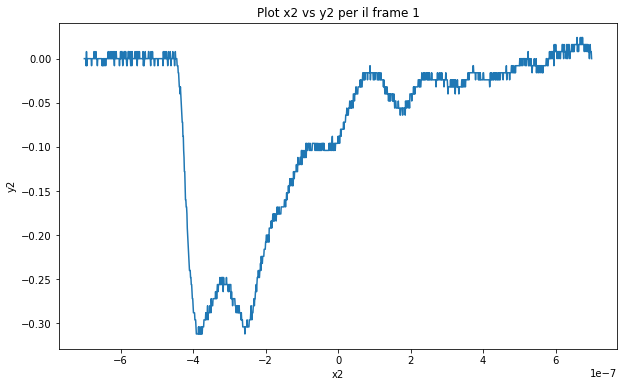

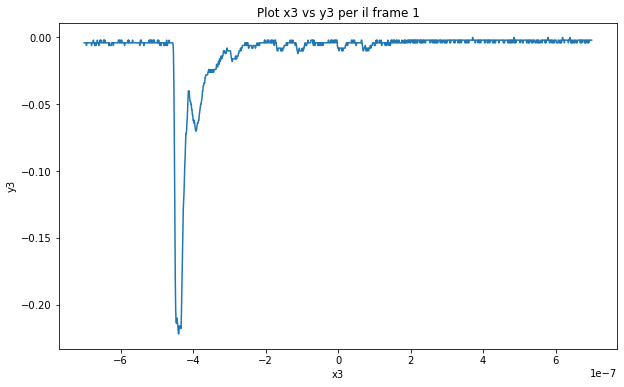

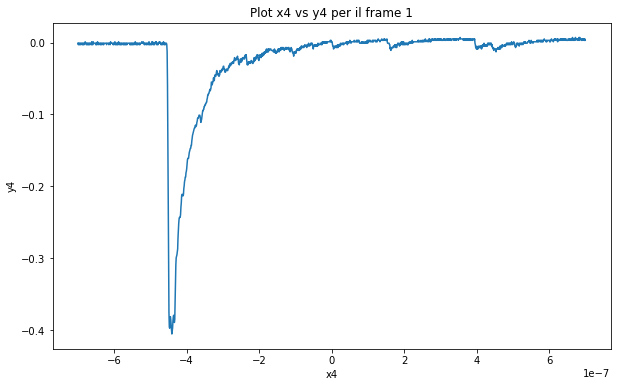

In [15]:
frame_to_plot = 1
selected_frame = df[df['frame'] == frame_to_plot]


plt.figure(figsize=(10, 6))
plt.plot(selected_frame['x1'], selected_frame['y1'])
plt.title(f'Plot x1 vs y1 per il frame {frame_to_plot}')
plt.xlabel('x1 (a.u.)')
plt.ylabel('y1 (a.u.)')
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(selected_frame['x2'], selected_frame['y2'])
plt.title(f'Plot x2 vs y2 per il frame {frame_to_plot}')
plt.xlabel('x2')
plt.ylabel('y2')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(selected_frame['x3'], selected_frame['y3'])
plt.title(f'Plot x3 vs y3 per il frame {frame_to_plot}')
plt.xlabel('x3')
plt.ylabel('y3')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(selected_frame['x4'], selected_frame['y4'])
plt.title(f'Plot x4 vs y4 per il frame {frame_to_plot}')
plt.xlabel('x4')
plt.ylabel('y4')
plt.show()

## Ampiezze

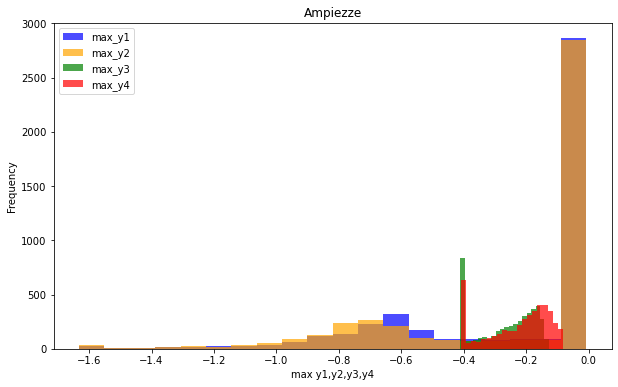

In [9]:
unique_frames = df['frame'].unique()

max_values_dict = {'frame': [], 'max_y1': [], 'max_y2': [], 'max_y3' : [], 'max_y4': []}

for frame in unique_frames:
    frame_data = df[df['frame'] == frame]
    max_y1 = frame_data['y1'].min()
    max_y2 = frame_data['y2'].min()
    max_y3 = frame_data['y3'].min()
    max_y4 = frame_data['y4'].min()
    
    
    max_values_dict['frame'].append(frame)
    max_values_dict['max_y1'].append(max_y1)
    max_values_dict['max_y2'].append(max_y2)
    max_values_dict['max_y3'].append(max_y3)
    max_values_dict['max_y4'].append(max_y4)

max_values_df = pd.DataFrame(max_values_dict)

plt.figure(figsize=(10, 6))
plt.hist(max_values_df['max_y1'], bins=20, color='blue', alpha=0.7, label='max_y1')
plt.hist(max_values_df['max_y2'], bins=20, color='orange', alpha=0.7, label='max_y2')
plt.hist(max_values_df['max_y3'], bins=20, color='green', alpha=0.7, label='max_y3')
plt.hist(max_values_df['max_y4'], bins=20, color='red', alpha=0.7, label='max_y4')
plt.title('Ampiezze')
plt.xlabel('max y1,y2,y3,y4')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Integrale

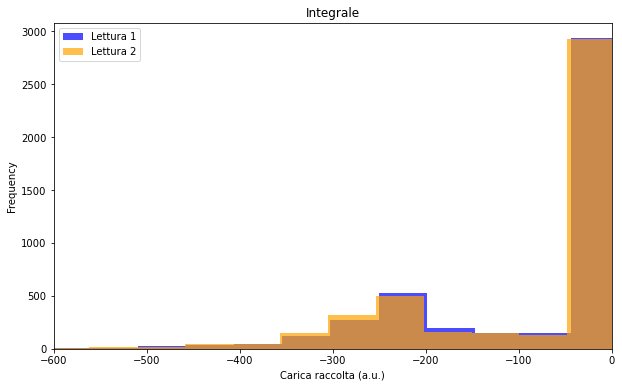

Numero di eventi totali: 4490


In [11]:
int_dict = {'frame': [], 'sum_y1': [], 'sum_y2': [], 'sum_y3':[], 'sum_y4':[]}

for frame in unique_frames:
    frame_data = df[df['frame'] == frame]
    sum_y1 = frame_data['y1'].sum()
    sum_y2 = frame_data['y2'].sum()
    sum_y3 = frame_data['y3'].sum()
    sum_y4 = frame_data['y4'].sum()
    
    int_dict['frame'].append(frame)
    int_dict['sum_y1'].append(sum_y1)
    int_dict['sum_y2'].append(sum_y2)
    int_dict['sum_y3'].append(sum_y3)
    int_dict['sum_y4'].append(sum_y4)
    

int_df = pd.DataFrame(int_dict)


plt.figure(figsize=(10, 6))
plt.hist(int_df['sum_y1'], bins=20, color='blue', alpha=0.7, label='Lettura 1')
plt.hist(int_df['sum_y2'], bins=20, color='orange', alpha=0.7, label='Lettura 2')
#plt.hist(int_df['sum_y3'], bins=20, color='green', alpha=0.7, label='Scintillatore 1')
#plt.hist(int_df['sum_y4'], bins=20, color='red', alpha=0.7, label='Scintillatore 2')
plt.title('Integrale')
plt.xlabel('Carica raccolta (a.u.)')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(- 600, 0)
plt.show()

events_tot = len(int_df)
print("Numero di eventi totali:", events_tot )

## Cut off

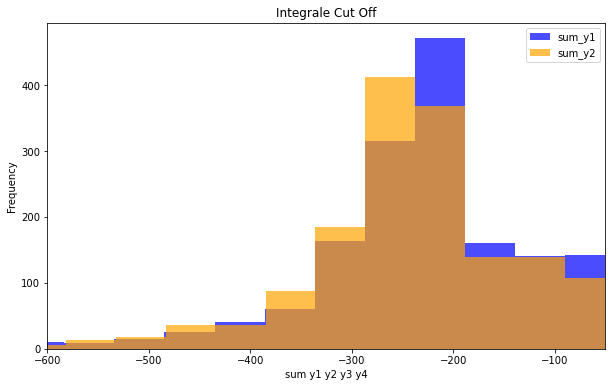

Numero di eventi: 1566
Percentuale:  34.87750556792873 %


In [12]:
int_dict1 = {'frame': [], 'sum_y1': [], 'sum_y2': [], 'sum_y3':[], 'sum_y4':[]}

for frame in unique_frames:
    frame_data = df[df['frame'] == frame]
    sum_y1 = frame_data['y1'].sum()
    sum_y2 = frame_data['y2'].sum()
    sum_y3 = frame_data['y3'].sum()
    sum_y4 = frame_data['y4'].sum()
    
    if  sum_y1 <= -40 and sum_y2 <= -40 and sum_y3 <= 0 and sum_y4 <= 0:
        int_dict1['frame'].append(frame)
        int_dict1['sum_y1'].append(sum_y1)
        int_dict1['sum_y2'].append(sum_y2)
        int_dict1['sum_y3'].append(sum_y3)
        int_dict1['sum_y4'].append(sum_y4)

int_df1 = pd.DataFrame(int_dict1)

plt.figure(figsize=(10, 6))
plt.hist(int_df1['sum_y1'], bins=20, color='blue', alpha=0.7, label='sum_y1')
plt.hist(int_df1['sum_y2'], bins=20, color='orange', alpha=0.7, label='sum_y2')
#plt.hist(int_df1['sum_y3'], bins=20, color='green', alpha=0.7, label='sum_y3')
#plt.hist(int_df1['sum_y4'], bins=20, color='red', alpha=0.7, label='sum_y4')
plt.title('Integrale Cut Off')
plt.xlabel('sum y1 y2 y3 y4')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(- 600, - 50)
plt.show()

events = len(int_df1)
print("Numero di eventi:", events )
print("Percentuale: ", events/events_tot * 100, "%")


## Carica vs Ampiezza

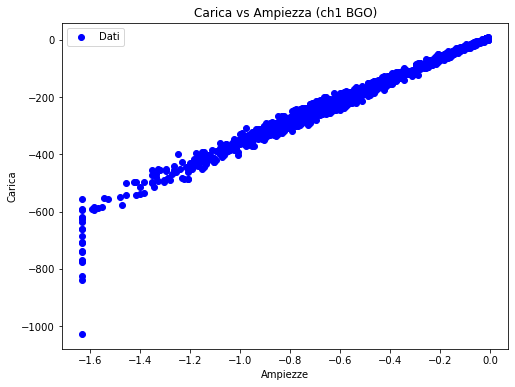

In [8]:
x = max_values_df['max_y1'] #ampiezza
y = int_df['sum_y1'] #carica

plt.figure(figsize=(8, 6)) 
plt.scatter(x, y, marker='o', linestyle='-', color='b', label='Dati')

plt.title('Carica vs Ampiezza (ch1 BGO)')
plt.xlabel('Ampiezze')
plt.ylabel('Carica')
plt.legend()


plt.show()

In [9]:
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]

print(f"Indice di correlazione: {correlation_coefficient}")

Indice di correlazione: 0.9952035410643466
